<a href="https://colab.research.google.com/github/REHAB199/Saudi-Arabia-Weather-Deep-learning/blob/main/Code/Makkah_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Import the libraries

 ---

In [29]:
# pandas
import pandas as pd
from pandas import datetime, DataFrame, Series, concat, read_csv
from pandas.core.window.rolling import Rolling

# numpy
import numpy as np
from numpy import array

# visualization
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib as mpl
# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'
from pylab import rcParams

# import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px

# warnings
import warnings
warnings.filterwarnings('ignore')

# math
from math import sqrt

# calendar
import calendar

# sklearn
from sklearn.model_selection import train_test_split


# scipy
import scipy
from scipy import stats 
from scipy.stats import kurtosis

# statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.graphics.gofplots import qqplot as qq
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

# tensorflow
import tensorflow as tf

## Loading & reading the data

---

In [2]:
df = pd.read_csv('/content/mkhdata.csv')

In [3]:
df

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,94805,Mecca,2017-01-01,00:00,2017,1,1,24,0,Clear,22,7,69.0,1016.0,16
1,94806,Mecca,2017-01-01,01:00,2017,1,1,1,0,Clear,21,0,73.0,1015.0,16
2,94807,Mecca,2017-01-01,02:00,2017,1,1,2,0,Clear,21,7,73.0,1015.0,16
3,94808,Mecca,2017-01-01,03:00,2017,1,1,3,0,Clear,21,7,73.0,1015.0,16
4,94809,Mecca,2017-01-01,04:00,2017,1,1,4,0,Clear,21,7,73.0,1015.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20263,115068,Mecca,2019-04-30,19:00,2019,4,30,19,0,Clear,32,15,43.0,1009.0,16
20264,115069,Mecca,2019-04-30,20:00,2019,4,30,20,0,Clear,31,15,46.0,1009.0,16
20265,115070,Mecca,2019-04-30,21:00,2019,4,30,21,0,Clear,30,19,49.0,1010.0,16
20266,115071,Mecca,2019-04-30,22:00,2019,4,30,22,0,Clear,30,15,49.0,1010.0,16


In [4]:
df.describe()

,Unnamed: 0,year,month,day,hour,minute,temp,wind,humidity,barometer,visibility
count,20268.000000,20268.000000,20268.000000,20268.000000,20268.000000,20268.000000,20268.000000,20268.000000,20268.000000,20268.000000,20268.000000
mean,104938.500000,2017.710480,5.958309,15.681419,12.498076,0.049142,29.023239,13.913312,54.158772,1008.713919,10.711417
std,5851.011964,0.698316,3.511464,8.787419,6.919406,1.198201,4.607044,8.369067,15.479241,4.854478,7.460926
min,94805.000000,2017.000000,1.000000,1.000000,1.000000,0.000000,16.000000,-1.000000,5.000000,996.000000,-1.000000
25%,99871.750000,2017.000000,3.000000,8.000000,7.000000,0.000000,26.000000,7.000000,44.000000,1005.000000,-1.000000
50%,104938.500000,2018.000000,6.000000,16.000000,12.000000,0.000000,29.000000,13.000000,55.000000,1009.000000,16.000000
75%,110005.250000,2018.000000,9.000000,23.000000,18.000000,0.000000,32.000000,19.000000,66.000000,1013.000000,16.000000
max,115072.000000,2019.000000,12.000000,31.000000,24.000000,59.000000,49.000000,163.000000,100.000000,1021.000000,16.000000


## Data Cleaning
---

In [5]:
# Unnamed: 0 is irrlevent 
delete_col =['Unnamed: 0']
df.drop(delete_col, axis =1 , inplace =True)

In [6]:
df.shape

(20268, 14)

In [7]:
# Converting the dt column to datetime object 
df['Datetime'] = pd.to_datetime(df['date'].apply(str)+' '+df['time'])
# Sorting by the date 
df.sort_values('Datetime', inplace=True)

In [8]:
# Features used in models
features = ['temp', 'humidity', 'barometer']

In [9]:
df[features].head()


,temp,humidity,barometer
0,22,69.0,1016.0
1,21,73.0,1015.0
2,21,73.0,1015.0
3,21,73.0,1015.0
4,21,73.0,1015.0


In [10]:
df[['Datetime', 'temp']].head(10)

,Datetime,temp
0,2017-01-01 00:00:00,22
1,2017-01-01 01:00:00,21
2,2017-01-01 02:00:00,21
3,2017-01-01 03:00:00,21
4,2017-01-01 04:00:00,21
5,2017-01-01 05:00:00,20
6,2017-01-01 06:00:00,20
7,2017-01-01 07:00:00,19
8,2017-01-01 08:00:00,20
9,2017-01-01 09:00:00,23


In [11]:
df.dtypes

city                  object
date                  object
time                  object
year                   int64
month                  int64
day                    int64
hour                   int64
minute                 int64
weather               object
temp                   int64
wind                   int64
humidity             float64
barometer            float64
visibility             int64
Datetime      datetime64[ns]
dtype: object

## EDA
---

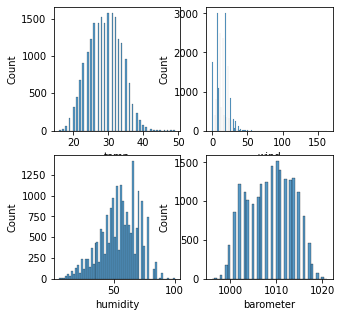

In [12]:
cols_to_plot = ['temp', 'wind', 'humidity', 'barometer']
plt.figure(figsize=(5, 5))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=col)

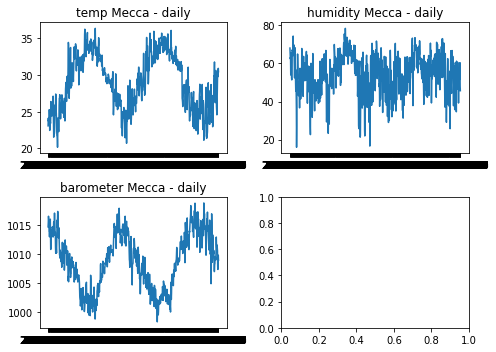

In [13]:
plot_features = df.groupby('date')[features].mean()

fig, axes = plt.subplots(
    nrows=2, 
    ncols=2, 
    figsize=(7, 5), 
    facecolor="w", 
    edgecolor="k"
)

for i, feature in enumerate(features):
    axes[i // 2, i % 2].plot(plot_features[feature])
    axes[i // 2, i % 2].set_title(f'{feature} Mecca - daily')
        
plt.tight_layout()

Text(0.5, 0, 'Date')

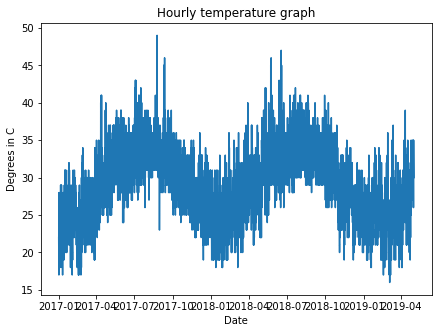

In [14]:
plt.figure(figsize=(7, 5))
plt.plot('Datetime', 'temp', data=df)
plt.title('Hourly temperature graph')
plt.ylabel('Degrees in C')
plt.xlabel('Date')

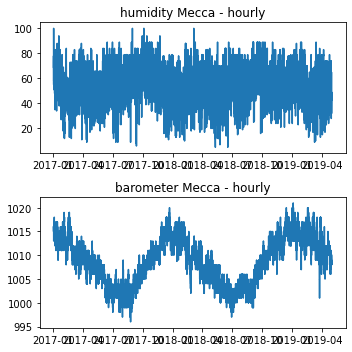

In [15]:
plot_features = df[features]
plot_features.index = df.Datetime

fig, axes = plt.subplots(
    nrows=2, 
    ncols=1, 
    figsize=(5,5), 
    facecolor="w", 
    edgecolor="k"
)

for i, feature in enumerate(['humidity', 'barometer']):
    axes[i % 2].plot(plot_features[feature])
    axes[i % 2].set_title(f'{feature} Mecca - hourly')
        
plt.tight_layout()

### Heatmaps 

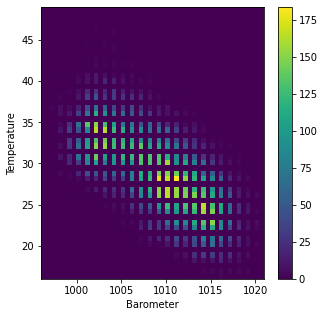

In [16]:
plt.figure(figsize=(5,5))
plt.hist2d(df['barometer'], df['temp'], bins=(50, 50))
plt.colorbar()
ax = plt.gca()
plt.xlabel('Barometer')
plt.ylabel('Temperature')
ax.axis('tight');

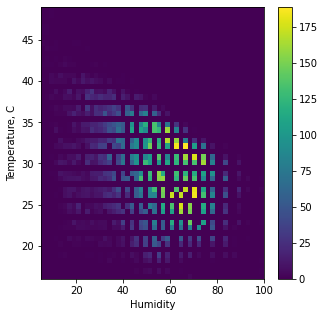

In [17]:
plt.figure(figsize=(5,5))
plt.hist2d(df['humidity'], df['temp'], bins=(50, 50))
plt.colorbar()
ax = plt.gca()
plt.xlabel('Humidity')
plt.ylabel('Temperature, C')
ax.axis('tight');

### Feature engineering 

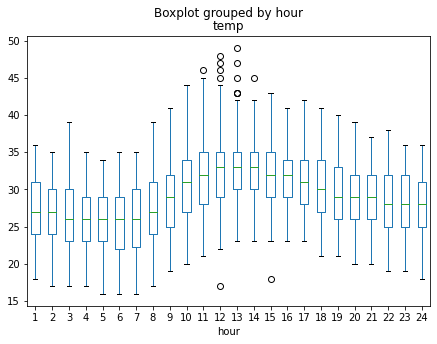

In [18]:
df.boxplot('temp', by='hour', figsize=(7,5), grid=False);

Text(0, 0.5, 'Temperature')

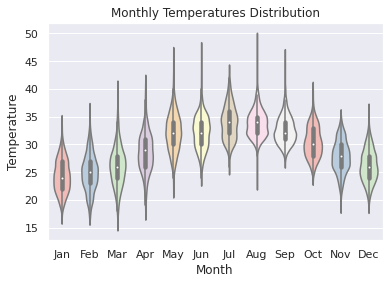

In [19]:
#Create a column that has the month name instead of the integer
df['months'] = df['month'].apply(lambda x: calendar.month_abbr[x])

sns.set(style="darkgrid")
#Violinplot
sns.violinplot(x="months", y="temp", data=df, palette="Pastel1").set_title('Monthly Temperatures Distribution')
plt.xlabel("Month") #Change x-Axis Label
plt.ylabel("Temperature") #Change y-Axis label

In [20]:
# Creating the cyclical daily feature 
df['day_cos'] = [np.cos(x * (2 * np.pi / 24)) for x in df['hour']]
df['day_sin'] = [np.sin(x * (2 * np.pi / 24)) for x in df['hour']]

In [21]:
dsin = df[['Datetime', 'temp', 'hour', 'day_sin', 'day_cos']].head(25).copy()
dsin['day_sin'] = [round(x, 3) for x in dsin['day_sin']]
dsin['day_cos'] = [round(x, 3) for x in dsin['day_cos']]

dsin

,Datetime,temp,hour,day_sin,day_cos
0,2017-01-01 00:00:00,22,24,-0.000,1.000
1,2017-01-01 01:00:00,21,1,0.259,0.966
2,2017-01-01 02:00:00,21,2,0.500,0.866
3,2017-01-01 03:00:00,21,3,0.707,0.707
4,2017-01-01 04:00:00,21,4,0.866,0.500
5,2017-01-01 05:00:00,20,5,0.966,0.259
6,2017-01-01 06:00:00,20,6,1.000,0.000
7,2017-01-01 07:00:00,19,7,0.966,-0.259
8,2017-01-01 08:00:00,20,8,0.866,-0.500
9,2017-01-01 09:00:00,23,9,0.707,-0.707


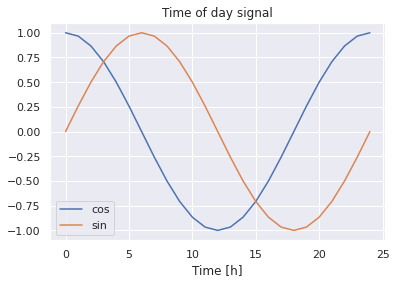

In [22]:
# Ploting the first 25 hours 
plt.plot(np.array(df['day_cos'])[:25], label='cos')
plt.plot(np.array(df['day_sin'])[:25], label='sin')
plt.xlabel('Time [h]')
plt.title('Time of day signal')
plt.legend()

## Stationarity Tests
---

Here, we are testing if a trend exists or not. Visually (by looking at the graph), we can see that there is no trend, as the series (its mean and variance and covariance specifically) is not increasing or decreasing overall over time (irrespective of seasonality). The best way to determine the presence of a trend is by visual inspection.
We could also do statistical tests to confirm. We have two tests that we could use: ADF and KPSS. KPSS is prefered over ADF statistically for the following reason:
A KPSS test has a null hypothesis of stationarity, whereas the ADF and PP tests assume that the data have I(1) non-stationarity
In testing for statistical significance, we have a Null Hypothesis that we are trying to reject. If the p-value is less than a cutoff ( 𝛼=0.05  is the normal value), we reject the Null Hypothesis, while if the p-value is greater, then we fail to reject (not accept, just state that we don't have enough evidence to reject) the Null Hypothesis.
That's why the KPSS is preferred. However, statistical tests are limited by their power, the assumptions about the data that they make, and with large sample sizes (here we have over 15000 observations), the tests will detect patterns that do not exist, i.e. they are insignificant. So statistical tests, in the presence of large sample sizes, the results are not to be trusted.

In [24]:
df_Train, df_test = train_test_split(df, test_size=0.2, random_state= 30 , shuffle = False)
df_Train.head(1)

,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility,Datetime,months,day_cos,day_sin
0,Mecca,2017-01-01,00:00,2017,1,1,24,0,Clear,22,7,69.0,1016.0,16,2017-01-01,Jan,1.0,-2.449294e-16


In [25]:
#KPSS Test
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(df_Train['temp'])

KPSS Statistic: 5.88997562933799
p-value: 0.01
num lags: 43
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value



The test indicates that the series is non-stationary, but this could be attributed to: (i) the presence of seasonality (not removed), and (ii) the large sample size. Therefore, we can ignore the result and trust our judgment

In [26]:
#perform augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

adf_test(df_Train['temp'])

ADF Statistic: -4.500622130008077
p-value: 0.0001961315424864616
Critial Values:
   1%, -3.4307544736177507
Critial Values:
   5%, -2.8617187607913457
Critial Values:
   10%, -2.5668651498897193


For the ADF Test, the p-value is less than 0.05 (even less than 0.01), we can say that we reject the Null Hypothesis of unit-root stationarity. For us, it means there is no trend. So we can use this if we want

## Fast Fourier Transform
---

A fast Fourier transform (FFT) is algorithm that computes the discrete Fourier transform (DFT) of a sequence. It is used in Signal Processing. It converts a signal from the original data, which is time for this case, to representation in the frequency domain. It assumes that there is no evolution over time over the series (stationary, i.e. no trend exists). To put this into simpler term, Fourier transform takes a time-based data, measures every possible cycle, and return the overall “cycle recipe” (the amplitude, offset and rotation speed for every cycle that was found). Note the obvious peaks at frequencies near 1/year and 1/day, which confirms that we have a monthly and yearly seasonality

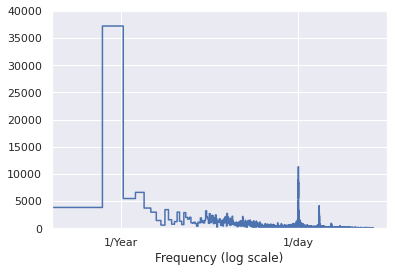

In [28]:
fft = tf.signal.rfft(df_Train['temp'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df_Train['temp'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 40000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')